# Load dataset

In [45]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Preprocess dataset

## One-hot encode data

In [46]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

## One-hot encode labels

In [47]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Create model

In [48]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [49]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Separate into validation and training datasets

In [50]:
x_val = x_train[:1000]
partial_x_train= x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Fit model

In [51]:
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 96us/step - loss: 2.4598 - acc: 0.5243 - val_loss: 1.6741 - val_acc: 0.6330
Epoch 2/9
7982/7982 [==============================] - 0s 35us/step - loss: 1.3807 - acc: 0.7018 - val_loss: 1.2943 - val_acc: 0.7030
Epoch 3/9
7982/7982 [==============================] - 0s 32us/step - loss: 1.0333 - acc: 0.7769 - val_loss: 1.1165 - val_acc: 0.7560
Epoch 4/9
7982/7982 [==============================] - 0s 33us/step - loss: 0.8090 - acc: 0.8264 - val_loss: 1.0344 - val_acc: 0.7780
Epoch 5/9
7982/7982 [==============================] - 0s 28us/step - loss: 0.6416 - acc: 0.8661 - val_loss: 0.9668 - val_acc: 0.8080
Epoch 6/9
7982/7982 [==============================] - 0s 31us/step - loss: 0.5101 - acc: 0.8966 - val_loss: 0.9288 - val_acc: 0.8210
Epoch 7/9
7982/7982 [==============================] - 0s 31us/step - loss: 0.4090 - acc: 0.9179 - val_loss: 0.9041 - val_acc: 0.8140
Epoch 8/9
7982

# Evaluate model

## Plot training and validation loss

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

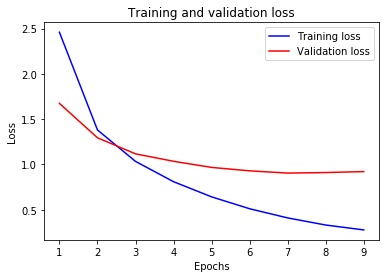

In [53]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plot training and validation accuracy

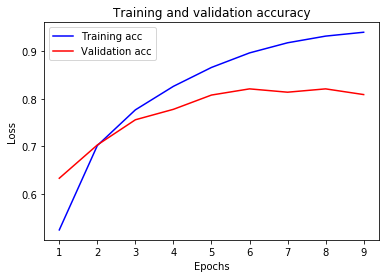

In [54]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Get final performance

In [55]:
test_loss, test_acc = model.evaluate(x_test, one_hot_test_labels)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

2246/2246 [==============================] - 0s 65us/step
Test loss: 0.9926902891160756
Test accuracy: 0.7858414960459524


# Predict

In [56]:
predictions = model.predict(x_test)

In [57]:
np.argmax(predictions[0])

3